In [1]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("total training data: %d" %len(x_train))
print("total testing data: %d" %len(x_test))
print("dimensions of image before:",(x_train[0]).shape)

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

print("dimensions of image now:",(x_train[0]).shape)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

total training data: 60000
total testing data: 10000
dimensions of image before: (28, 28)
dimensions of image now: (28, 28, 1)


In [3]:
def create_cnn(epoch):

    model = tf.keras.models.Sequential()

    model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.Dropout(0.25))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))

    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    model.fit(x_train, y_train, epochs=epoch)
    
    model.save("mnist_cnn.model")

In [4]:
# create_cnn(2)

model = tf.keras.models.load_model("mnist_cnn.model")

In [5]:
val_loss, val_acc = model.evaluate(x_test, y_test, verbose=0)
print("\nval loss:", val_loss, "\nval_acc:", val_acc)


val loss: 0.043459827279142334 
val_acc: 0.9855


In [6]:
def predict_digit(image_path):

    image = [cv2.imread(image_path, cv2.IMREAD_GRAYSCALE,),]
    print("image shape:",image[0].shape)

    image[0] = cv2.resize(image[0], (28, 28))     # Scaling the image to 28*28
    plt.imshow(image[0])
    image[0] = image[0].reshape(28, 28, 1)        # Converting image to 3 dim for CNN
    image[0] = image[0]/255
    #image[0] = 1 - image[0]                       # Inverting the pixles

    predict = model.predict([image])
    # print(predict)
    print("Predicted Number:", np.argmax(predict))

image shape: (32, 16)
Predicted Number: 0


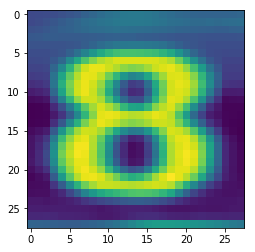

In [7]:
predict_digit("digit/eight.jpg")

(32, 90)


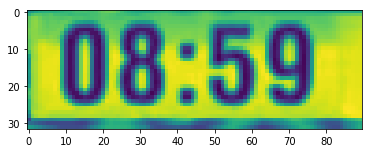

In [8]:
img = cv2.imread("multi_digit/plate.jpg", cv2.IMREAD_GRAYSCALE)
img = img.astype('float32')
img /= 255
img = 1 - img
plt.imshow(img)
print(img.shape)

(32, 90)


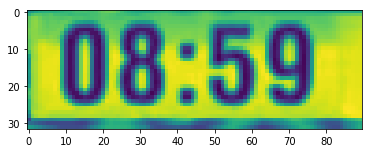

In [9]:
x1, x2 = 0, 32
y1, y2 = 0, 90
crop_img = img[x1:x2, y1:y2]
plt.imshow(crop_img)
print(crop_img.shape)

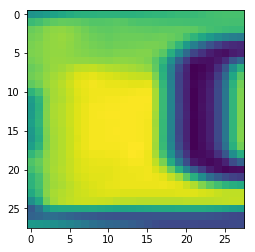

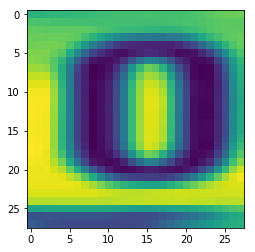

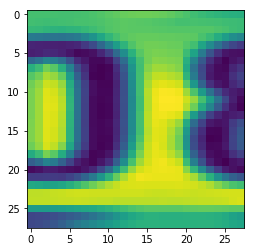

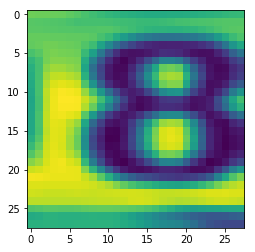

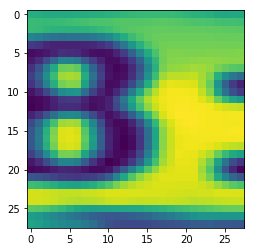

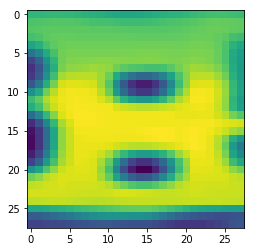

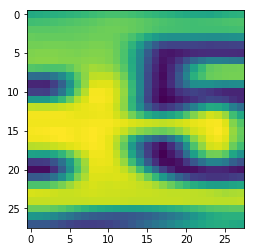

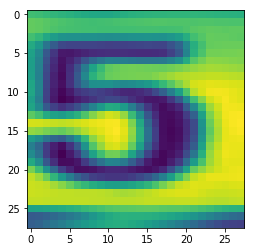

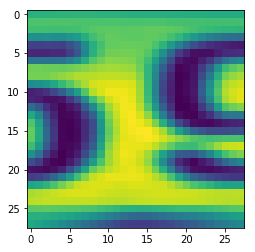

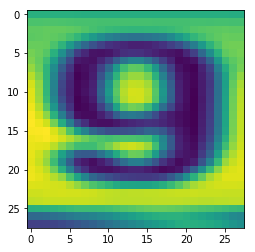

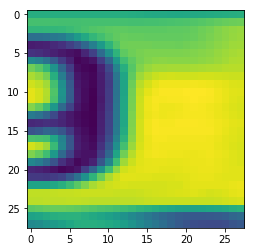

In [10]:
img_height = crop_img.shape[0]
img_width = crop_img.shape[1]
window_width = 15
stride = 7

plate = []

for i in range(0, img_width-window_width, stride):
    
    temp_img = crop_img[0:img_height, i:i+window_width]
    temp_img = cv2.resize(temp_img, (28, 28))
    plate.append(temp_img)

for i in range(len(plate)):
    
    plt.imshow(plate[i])
    plt.show()
    plate[i] = plate[i].reshape(28, 28, 1)

In [30]:
predict = model.predict([plate])

In [31]:
x = np.argmax(predict[8])
print(x)

2
